In [1]:
import pandas as pd
import numpy as np
import numpy as np
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment= None # default='warn'
df = pd.read_csv('sales_full_data.csv')
print(df.shape)
df=df.dropna()
df


(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Q1. Which month had the highest and lowest sales? What do you think the reason for this was?

In [2]:
#extracting the month using order date
df=df[df['Order Date'].str[0:2]!='Or']


df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32') 
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])
#Calculating the Sales in each month
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show(close=None, block=None)>

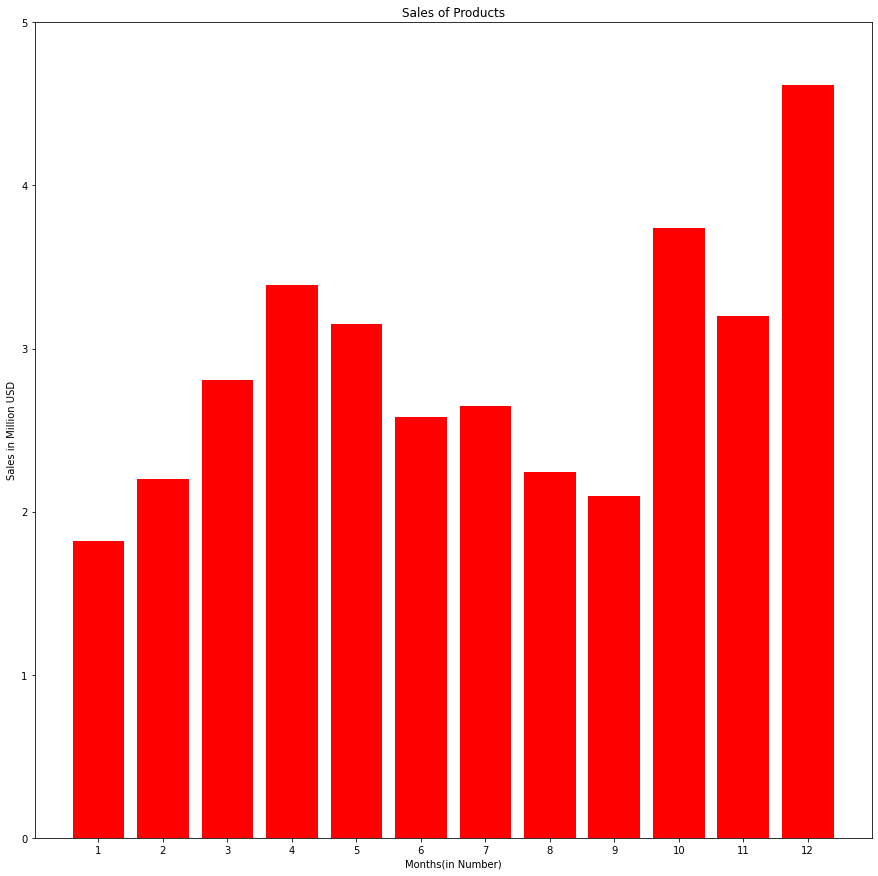

In [5]:
#visualizing the results
#bar graph which visualises the sales of product every month
import matplotlib.pyplot as plt

months=range(1,13)
results=df.groupby('Month').sum()
plt.figure(figsize=(15,15))
plt.bar(months,results['Sales'],color='red')
plt.xticks(months)
labels,location=plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.ylabel('Sales in Million USD')
plt.xlabel('Months(in Number)')
plt.title('Sales of Products')
plt.show

Its quite visible from the bar graph that the month of December has the best sales figures. According to me this is a result of it being a month with a lot of holidays as this dataset is from the USA. The month with the lowest sales was January.

Q2)At what time of the day would you put out advertisements so that sales increase?

In [9]:
pd.options.mode.chained_assignment = None
df['Order_Date_DTO'] = pd.to_datetime(df['Order Date'],errors='coerce')
#to extract the hour of purchase
df['Hour']=df['Order_Date_DTO'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Order_Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,9


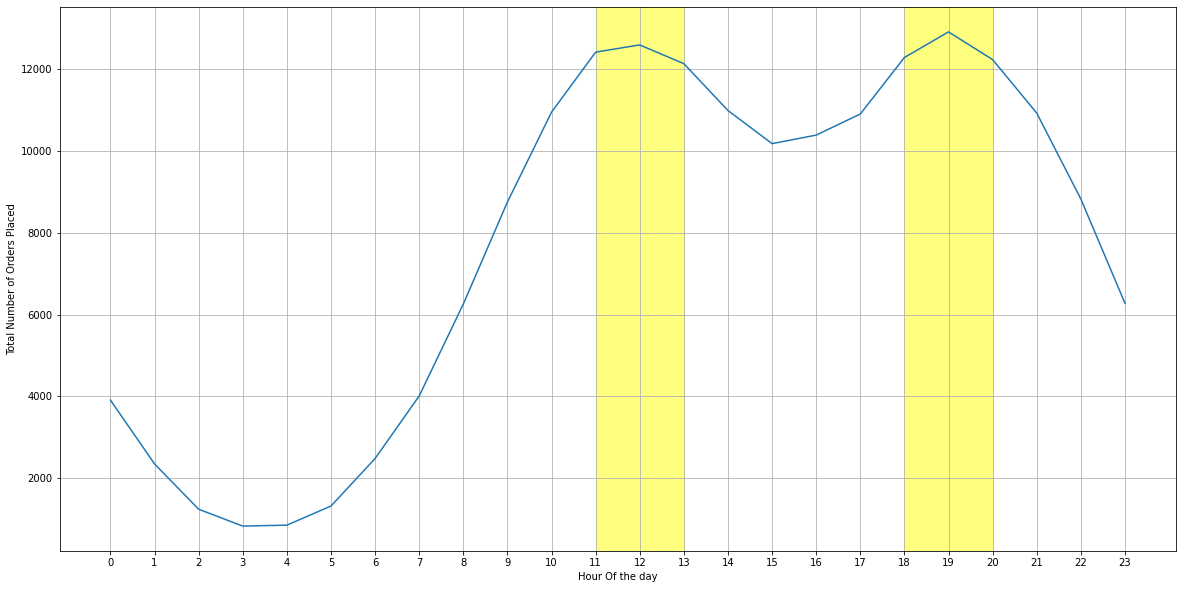

In [12]:
#grouping the data according to the hour of purchase
res2 = df.groupby(['Hour']).count()
res2 = df.groupby(['Hour'])['Quantity Ordered'].count()
hours=[hour for hour,df in df.groupby('Hour')]
#visualising the data
plt.figure(figsize=(20,10))
plt.plot(hours,res2)
plt.axvspan(11,13,color='yellow',alpha=0.5)
plt.axvspan(18,20,color='yellow',alpha=0.5)
plt.xticks(hours)
plt.xlabel('Hour Of the day')
plt.ylabel('Total Number of Orders Placed')
plt.grid()
plt.show()

A quick glance at the graph above suggests that most of the orders were placed during 11am to 1pm and 6pm to 8pm. Therefore it would result in best sales if the advertisement were to be shown around and in these hours.


Q3)What products were sold the most?

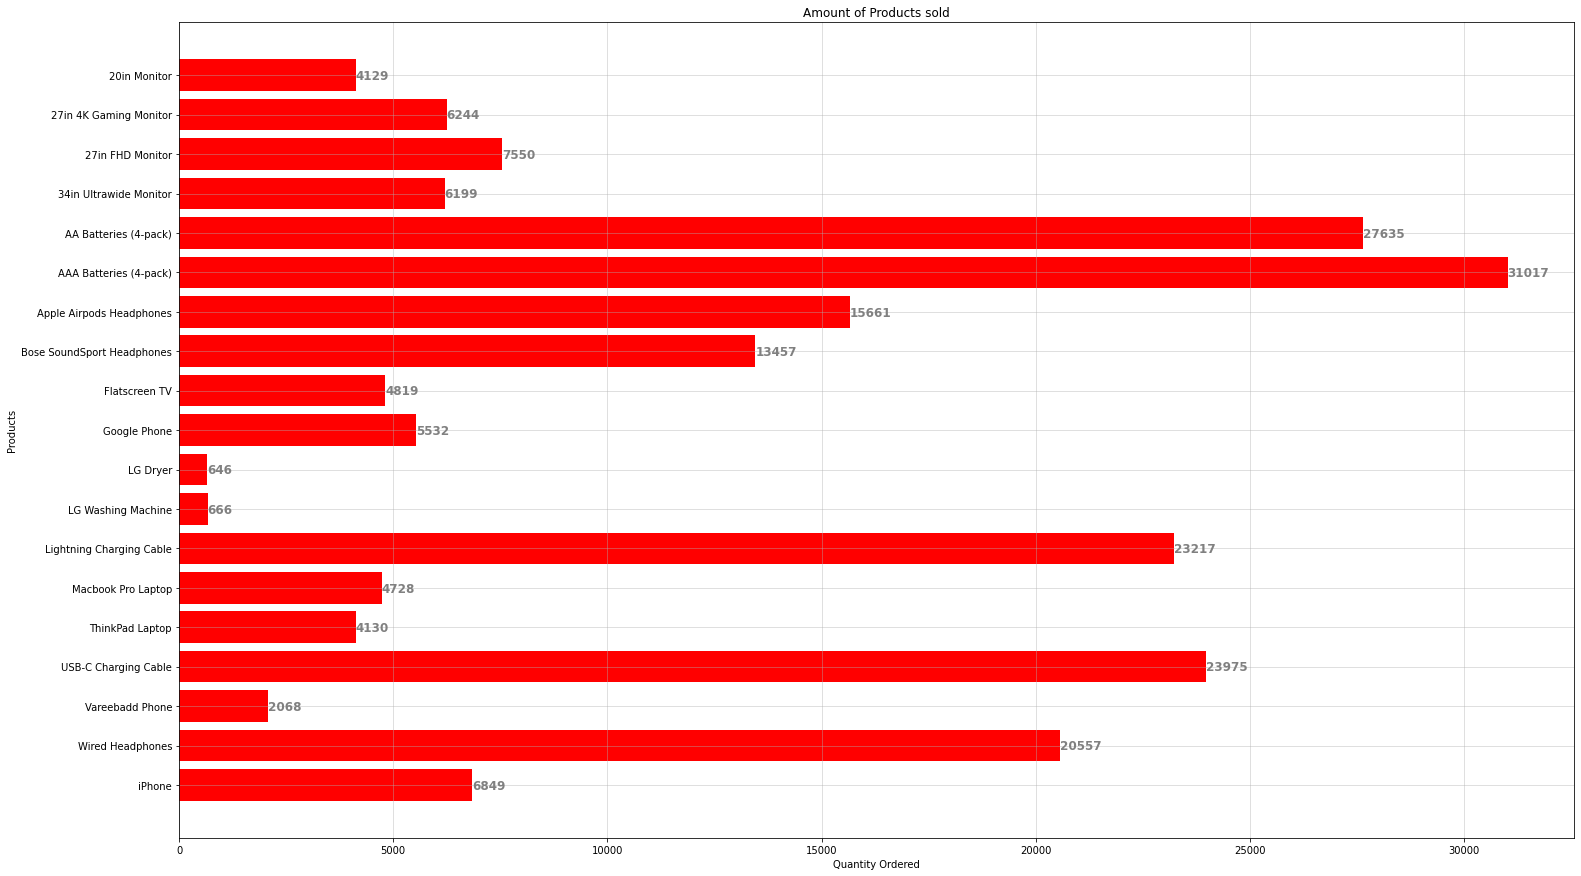

In [18]:
product_grp=df.groupby('Product')

quantity_ordered=product_grp.sum()['Quantity Ordered']
products=[product for product,df in product_grp]
fig,ax=plt.subplots(figsize=(25,15))
ax.barh(products,quantity_ordered,color='red')
ax.grid(alpha=0.5)
ax.invert_yaxis()
#to display the values that are highest for disticnt products
for i in ax.patches:
    plt.text(i.get_width()+0.2,i.get_y()+0.5,
    str(round((i.get_width()),2)),
    fontsize=12,fontweight='bold',
    color='grey')

ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('Products')
ax.set_title('Amount of Products sold')

plt.show()

The product that sold the most was AAA battery pack.